In [167]:
import math

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

## 1.2

### 1.2.3

In [168]:
class Trigonometry:
    def __init__(self, deg):
        self.deg = deg
        self.rad = self._deg_to_rad()

    def _deg_to_rad(self):
        return self.deg * math.pi / 180

    def sin(self):
        return round(math.sin(self.rad), 1)

    def cos(self):
        return round(math.cos(self.rad), 1)

    def tan(self):
        return round(math.tan(self.rad), 1)

    def arcsin(self):
        return round(math.asin(self.rad), 1)

    def arccos(self):
        return round(math.acos(self.rad), 1)

    def arctan(self):
        return round(math.atan(self.rad), 1)

In [169]:
d = Trigonometry(30)

print(d.sin())
print(d.cos())
print(d.tan())
print(d.arcsin())
print(d.arccos())
print(d.arctan())

0.5
0.9
0.6
0.6
1.0
0.5


In [170]:
result = round(Trigonometry(30)._deg_to_rad(), 3)
print(result)

0.524


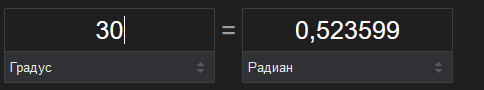

### 1.2.2

In [171]:
tree = ['a',
                ['b',
                        ['d'],
                        ['e']
                ],
                ['c',
                        ['f']
                ]
        ]

In [172]:
def print_tree(tree):
    root, left, right = tree
    print("Корень:", root)
    print("Левое поддерево:", left)
    print("Правое поддерево:", right)

print_tree(tree)

Корень: a
Левое поддерево: ['b', ['d'], ['e']]
Правое поддерево: ['c', ['f']]


In [173]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def print_tree(self):
        self._print_tree_recursive(self, "", True)

    def _print_tree_recursive(self, node, prefix, is_left):
        if node is not None:
            print(prefix, end="")
            print("└── " if is_left else "┌── ", end="")
            print(node.data)

            next_prefix = prefix + ("    " if is_left else "│   ")
            self._print_tree_recursive(node.right, next_prefix, False)
            self._print_tree_recursive(node.left, next_prefix, True)

    def insert_data(self, data):
        if data < self.data:
            if self.left:
                self.left.insert_data(data)
            else:
                self.left = Tree(data)
        elif data > self.data:
            if self.right:
                self.right.insert_data(data)
            else:
                self.right = Tree(data)

In [174]:
root = Tree(27)
root.insert_data(14)
root.insert_data(35)
root.insert_data(20)
root.insert_data(20)
root.insert_data(31)
root.insert_data(38)
root.insert_data(2)
root.insert_data(29)
root.insert_data(5)
root.insert_data(1)
root.insert_data(96)

In [175]:
root.print_tree()

└── 27
    ┌── 35
    │   ┌── 38
    │   │   ┌── 96
    │   └── 31
    │       └── 29
    └── 14
        ┌── 20
        └── 2
            ┌── 5
            └── 1


In [176]:
root.__dict__

{'left': <__main__.Tree at 0x24d78176f10>,
 'right': <__main__.Tree at 0x24d78176820>,
 'data': 27}

## 1.3

### 1.3.1

In [177]:
df = pd.DataFrame(np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]))
target = [0, 0, 0, 1, 1, 1]

In [178]:
clf = DecisionTreeClassifier()

In [179]:
clf.fit(df, target)

DecisionTreeClassifier()

In [180]:
new_data = np.array([[-2, -2]])

In [181]:
prediction = clf.predict(new_data)
prediction

array([0])

In [182]:
new_data = np.array([[-2, 2]])

In [183]:
prediction = clf.predict(new_data)
prediction

array([0])

In [184]:
new_data = np.array([[2, -2]])

In [185]:
prediction = clf.predict(new_data)
prediction

array([1])

In [186]:
from sklearn import tree

[Text(0.5, 0.75, 'x[0] <= 0.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

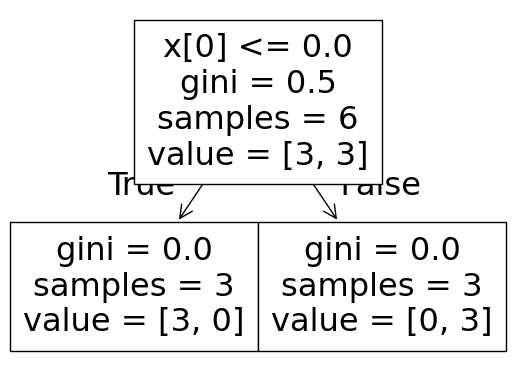

In [187]:
tree.plot_tree(clf)

## 1.4

### 1.4.1

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from ydata_profiling import ProfileReport

In [189]:
wine_df = pd.read_csv('wine_data.csv')

In [190]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [191]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [192]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [193]:
report = ProfileReport(wine_df)

In [194]:
#report.to_file('wine_report.html')

In [195]:
wine_df.shape

(1599, 12)

In [196]:
wine_df = wine_df.drop_duplicates().reset_index(drop=True)

In [197]:
wine_df.shape

(1359, 12)

In [198]:
wine_df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1354      9.5        6  
1355     10.5        5  
1356     11.2        6  
1357     10.2        5  
1358     11.0        6

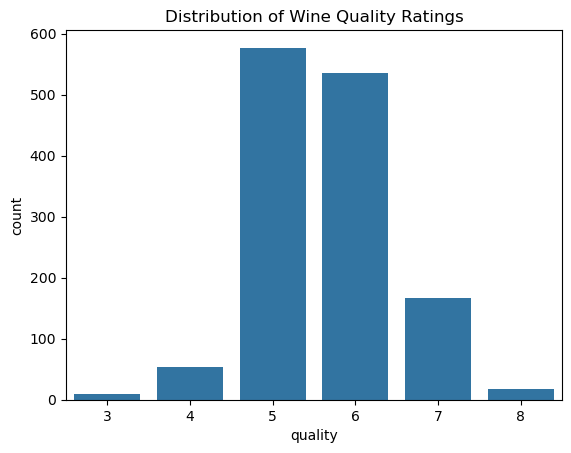

In [199]:
sns.countplot(x='quality', data=wine_df)
plt.title('Distribution of Wine Quality Ratings')
plt.show()


In [200]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality'].apply(
    lambda y_value: 1 if y_value >= 7 else 0
    )

In [201]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [202]:
print(y.shape, y_train.shape, y_test.shape)

(1359,) (1087,) (272,)


In [203]:
random_forest = RandomForestClassifier()

In [204]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [209]:
y_pred = random_forest.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_mse = mean_squared_error(y_pred, y_test)
test_data_f1 = f1_score(y_pred, y_test)

In [ ]:
print(
    f'''
    Accuracy: {test_data_accuracy},
    MSE: {test_data_mse},
    F1: {test_data_f1}'''
    )


    Accuracy: 0.9154411764705882,
    MSE: 0.08455882352941177,
    R2: 0.5490196078431373


In [207]:
plt.figure(figsize=(192, 108)) # Adjust figure size as needed
plot_tree(random_forest.estimators_[0], 
          filled=True, # Color nodes based on class
          rounded=True, # Rounded corners for nodes
          precision=2)  # Decimal places for impurity scores
plt.savefig('tree.png')
